In [1]:
pip install librosa

  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23154 sha256=adff0386cce82c1eac4bed13840614d01c915a741a2ceaae73252924a6edf4b8
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\a2\a3\bd\ec1568ce7515115a11ab686d509ad302124c782af065de47ee
Successfully built audioread
Note: you may need to restart the kernel to use updated packages.


In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Audio
from librosa.feature import mfcc
from sklearn.metrics import plot_confusion_matrix,confusion_matrix

In [2]:
y,sr=librosa.load('c:/Users/user/Desktop/Data/UrbanSound8K/audio/fold3/15356-2-0-0.wav',sr=22050)
y.shape,sr

((88200,), 22050)

In [3]:
Audio(y,rate=sr)

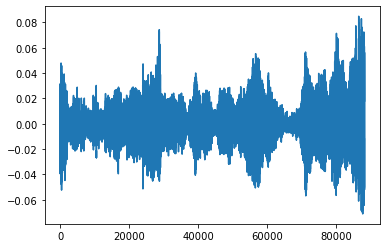

In [4]:
plt.plot(y)

# scipy for audio:


In [5]:
from scipy.io.wavfile import read
sr,y=read('c:/Users/user/Desktop/Data/UrbanSound8K/audio/fold3/15356-2-0-0.wav')
sr,y.shape

(44100, (176400, 2))

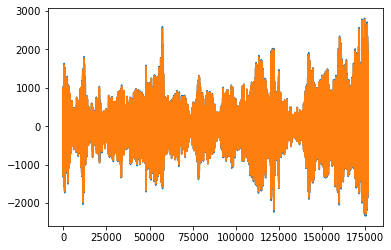

In [6]:
plt.plot(y)
plt.show()

In [7]:
folder_path='c:/Users/user/Desktop/Data/UrbanSound8K/'
df=pd.read_csv(folder_path+'metadata/UrbanSound8K.csv')
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


# reading audio using metadata

In [8]:
y,sr=librosa.load(folder_path+'audio/fold'+str(df.fold[0])+'/'+df.slice_file_name[0],sr=None,mono=False)
y.shape,sr

((2, 14004), 44100)

In [9]:
Audio(y,rate=sr)

In [10]:
k=np.random.randint(0,8732)
print(df['class'][k])
y,sr=librosa.load(folder_path+'audio/fold'+str(df.fold[k])+'/'+df.slice_file_name[k],sr=None,mono=True)
y.shape,sr
Audio(y,rate=sr)

engine_idling


# DATA  Understanding

In [11]:
df['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [12]:
df['fold'].value_counts()

4     990
5     936
3     925
2     888
1     873
7     838
10    837
6     823
9     816
8     806
Name: fold, dtype: int64

# Features extraction

In [13]:
mfcc=mfcc(y=y,sr=sr,n_mfcc=20)
mfcc

array([[-337.3013    , -285.10858   , -261.2864    , ..., -271.59866   ,
        -265.40762   , -315.7114    ],
       [ 139.406     ,  130.11246   ,  108.19058   , ...,  104.56825   ,
         104.70383   ,  124.25856   ],
       [  -3.795753  ,   -6.812134  ,   -3.9449859 , ...,  -11.579096  ,
          -5.3650103 ,   -8.325069  ],
       ...,
       [  -2.0452373 ,    0.7757237 ,    3.3070855 , ...,    1.7803175 ,
          -0.68959993,   -2.9859061 ],
       [  -8.531538  ,   -8.9965925 ,   -5.793886  , ...,    2.7891898 ,
          -0.9181018 ,   -4.887329  ],
       [  -2.8520572 ,    6.5157633 ,   10.68845   , ...,   14.555063  ,
          11.9070015 ,    5.342351  ]], dtype=float32)

In [14]:
mfcc.T.shape

(376, 20)

In [15]:
mfcc.T.mean(axis=0)

array([-282.90292   ,  121.89615   ,  -12.971479  ,   14.330034  ,
        -19.220888  ,   16.488674  ,   -8.382153  ,    7.820451  ,
         -5.877679  ,    1.3734009 ,  -12.990011  ,   -9.655912  ,
         -3.7653801 ,   -1.984363  ,   -1.0466788 ,    0.62529963,
          8.341391  ,    4.823817  ,   -3.3223312 ,    5.300077  ],
      dtype=float32)

# extracting all features

In [16]:
def feature_extractor(file_name):
    audio_data,sample_rate=librosa.load(file_name)
    mfcc_fetures=librosa.feature.mfcc(y=audio_data,sr=sample_rate,n_mfcc=20)
    mfcc_features_scaled=np.mean(mfcc_fetures.T,axis=0)
    return  mfcc_features_scaled

In [17]:
feature_extractor('c:/Users/user/Desktop/Data/UrbanSound8K/audio/fold3/15356-2-0-0.wav')

array([-338.5333   ,   97.58573  ,  -35.33742  ,   19.7346   ,
        -10.998858 ,   13.650964 ,    3.5883687,    9.30993  ,
          3.6252947,    8.750119 ,   -3.8297117,    5.824665 ,
         -9.6666975,    7.3235188,   -3.9372594,    7.9436946,
         -1.4636936,    7.7932835,   -7.1550803,    3.6722066],
      dtype=float32)

In [18]:
from tqdm import tqdm
import numpy as np
import os
audio_folder_path='c:/Users/user/Desktop/Data/UrbanSound8K/audio/'
extracted_features=[]
for index_num,row in tqdm(df.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_folder_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row['class']
    data=feature_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [11:19,  7.66it/s]C:\Users\user\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8325it [40:58,  9.55it/s] C:\Users\user\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
8327it [40:58, 11.18it/s]C:\Users\user\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [41:57,  3.47it/s]


In [19]:
len(extracted_features)

8732

In [20]:
extracted_features

[[array([-2.1435951e+02,  6.6004631e+01, -1.2622524e+02, -5.7349590e+01,
         -1.7264309e+01, -2.6449442e+01, -7.2807732e+00,  1.4941404e+01,
          9.7562399e+00,  1.1488570e+01, -9.6194258e+00,  2.6782138e-02,
         -1.5837903e+01,  8.7592945e+00, -5.2667403e+00, -1.7018179e+00,
         -1.7631666e+01,  1.5813587e+00, -5.0098877e+00,  8.4312334e+00],
        dtype=float32),
  'dog_bark'],
 [array([-420.23825  ,  103.904526 ,  -47.55043  ,   55.606483 ,
            5.350782 ,   12.434221 ,    6.779347 ,    6.292045 ,
            2.7299488,    8.500507 ,   -7.737784 ,   17.959957 ,
           -6.7427807,   11.154059 ,    1.7554703,    5.540475 ,
           -1.8327674,   10.480143 ,   -5.7628045,    6.669657 ],
        dtype=float32),
  'children_playing'],
 [array([-455.2568   ,  116.408104 ,  -41.6107   ,   47.2071   ,
            4.6504264,   19.322447 ,   12.985572 ,    5.0751967,
            3.0532618,    7.61018  ,   -8.801887 ,   11.849341 ,
           -1.554925 ,   10

# preparing x and y

In [21]:
np.array(extracted_features[0][0].tolist())

array([-2.14359512e+02,  6.60046310e+01, -1.26225243e+02, -5.73495903e+01,
       -1.72643089e+01, -2.64494419e+01, -7.28077316e+00,  1.49414043e+01,
        9.75623989e+00,  1.14885702e+01, -9.61942577e+00,  2.67821383e-02,
       -1.58379030e+01,  8.75929451e+00, -5.26674032e+00, -1.70181787e+00,
       -1.76316662e+01,  1.58135867e+00, -5.00988770e+00,  8.43123341e+00])

In [22]:
x=np.array([i[0].tolist() for i in extracted_features])

In [23]:
x.shape

(8732, 20)

In [24]:
y=np.array([i[1] for i in extracted_features])
y.shape

(8732,)

In [25]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [26]:
audio=pd.DataFrame(x)
audio['label']=y
audio.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,-214.359512,66.004631,-126.225243,-57.349590,-17.264309,-26.449442,-7.280773,14.941404,9.756240,11.488570,...,0.026782,-15.837903,8.759295,-5.266740,-1.701818,-17.631666,1.581359,-5.009888,8.431233,dog_bark
1,-420.238251,103.904526,-47.550430,55.606483,5.350782,12.434221,6.779347,6.292045,2.729949,8.500507,...,17.959957,-6.742781,11.154059,1.755470,5.540475,-1.832767,10.480143,-5.762805,6.669657,children_playing
2,-455.256805,116.408104,-41.610699,47.207100,4.650426,19.322447,12.985572,5.075197,3.053262,7.610180,...,11.849341,-1.554925,10.021297,0.559735,6.055298,-6.639349,3.747846,-2.924166,12.053761,children_playing
3,-409.939392,96.085556,-29.919291,47.638351,6.763555,9.838276,7.694974,3.081153,2.038530,5.989011,...,18.593916,-3.856829,11.185817,-3.625854,3.480807,-0.527970,7.954938,-1.339017,6.880064,children_playing
4,-442.846558,108.394539,-47.178040,55.187874,7.742002,20.302288,7.347320,5.860623,7.027884,6.742701,...,14.406661,-1.839403,8.542975,2.805647,9.005601,-5.710881,5.383007,-7.941532,12.409350,children_playing


In [27]:
len(x),len(y)

(8732, 8732)

In [28]:
y=audio[['label']]
y=pd.get_dummies(y,drop_first=False)
y

,label_air_conditioner,label_car_horn,label_children_playing,label_dog_bark,label_drilling,label_engine_idling,label_gun_shot,label_jackhammer,label_siren,label_street_music
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8727,0,1,0,0,0,0,0,0,0,0
8728,0,1,0,0,0,0,0,0,0,0
8729,0,1,0,0,0,0,0,0,0,0
8730,0,1,0,0,0,0,0,0,0,0


In [29]:
np.unique(y,return_counts=True)

(array([0, 1], dtype=uint8), array([78588,  8732], dtype=int64))

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=100,random_state=10)

In [31]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8632, 20), (100, 20), (8632, 10), (100, 10))

# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=1,weights='distance')
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.94

# Decision tree

# ANN

In [33]:

from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.optimizers import Adam

In [34]:
model=Sequential()
# first layer
model.add(Dense(200,input_shape=(20,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# second layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# third layer
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# output layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               4200      
                                                                 
 activation (Activation)     (None, 200)               0         
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 activation_1 (Activation)   (None, 100)               0         
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                5

In [36]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
model.fit(x_train,y_train,batch_size=32,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
270/270 [==============================] - 3s 7ms/step - loss: 8.2833 - accuracy: 0.1204 - val_loss: 2.2836 - val_accuracy: 0.1500
Epoch 2/100
270/270 [==============================] - 1s 6ms/step - loss: 2.5266 - accuracy: 0.1266 - val_loss: 2.2808 - val_accuracy: 0.1400
Epoch 3/100
270/270 [==============================] - 1s 4ms/step - loss: 2.3241 - accuracy: 0.1273 - val_loss: 2.2494 - val_accuracy: 0.1600
Epoch 4/100
270/270 [==============================] - 1s 5ms/step - loss: 2.2850 - accuracy: 0.1309 - val_loss: 2.2213 - val_accuracy: 0.1700
Epoch 5/100
270/270 [==============================] - 1s 4ms/step - loss: 2.2557 - accuracy: 0.1387 - val_loss: 2.2164 - val_accuracy: 0.1700
Epoch 6/100
270/270 [==============================] - 1s 4ms/step - loss: 2.2375 - accuracy: 0.1433 - val_loss: 2.2112 - val_accuracy: 0.1700
Epoch 7/100
270/270 [==============================] - 1s 4ms/step - loss: 2.2194 - accuracy: 0.1425 - val_loss: 2.1968 - val_accuracy: 0.1400

Epoch 58/100
270/270 [==============================] - 1s 5ms/step - loss: 1.1410 - accuracy: 0.6186 - val_loss: 0.8207 - val_accuracy: 0.7700
Epoch 59/100
270/270 [==============================] - 1s 5ms/step - loss: 1.1252 - accuracy: 0.6320 - val_loss: 0.8473 - val_accuracy: 0.7500
Epoch 60/100
270/270 [==============================] - 1s 4ms/step - loss: 1.1387 - accuracy: 0.6253 - val_loss: 0.8570 - val_accuracy: 0.7200
Epoch 61/100
270/270 [==============================] - 1s 3ms/step - loss: 1.1139 - accuracy: 0.6346 - val_loss: 0.8313 - val_accuracy: 0.7500
Epoch 62/100
270/270 [==============================] - 1s 4ms/step - loss: 1.1127 - accuracy: 0.6351 - val_loss: 0.7962 - val_accuracy: 0.7100
Epoch 63/100
270/270 [==============================] - 1s 3ms/step - loss: 1.1132 - accuracy: 0.6310 - val_loss: 0.8051 - val_accuracy: 0.7100
Epoch 64/100
270/270 [==============================] - 1s 5ms/step - loss: 1.1036 - accuracy: 0.6430 - val_loss: 0.8133 - val_accuracy:

In [38]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.6332 - accuracy: 0.8100


[0.6331967115402222, 0.8100000023841858]

In [39]:
model.evaluate(x_train,y_train)

270/270 [==============================] - 1s 3ms/step - loss: 0.6375 - accuracy: 0.7934


[0.6375258564949036, 0.7934430241584778]

In [40]:
y_predict=np.array([np.argmax(i) for i in model.predict(x_test)])

4/4 [==============================] - 0s 3ms/step


In [41]:
y_actual=np.array([np.argmax(i) for i in y_test.values])

In [42]:
confusion_matrix(y_actual,y_predict)

array([[13,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  5,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  6,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  1,  5,  1,  0,  1,  0,  1,  0],
       [ 0,  0,  0,  0,  5,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  0, 10,  0,  0,  1,  0],
       [ 0,  0,  1,  0,  0,  0,  2,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0, 13,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 12,  0],
       [ 3,  0,  0,  0,  0,  1,  0,  1,  0, 10]], dtype=int64)